In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Acquire data from kaggle: 2 + 3 = 5 pts <br/>
This dataset is available on kaggle: https://www.kaggle.com/c/instacart-market-basket-analysis/data

In [6]:
aisles=pd.read_csv('C:/Users/pooja/Desktop/8090 Python/Final project/Data/aisles.csv')
dep=pd.read_csv('C:/Users/pooja/Desktop/8090 Python/Final project/Data/departments.csv')
order_prod_prior=pd.read_csv('C:/Users/pooja/Desktop/8090 Python/Final project/Data/order_products__prior.csv')
order_prod_train=pd.read_csv('C:/Users/pooja/Desktop/8090 Python/Final project/Data/order_products__train.csv')
order=pd.read_csv('C:/Users/pooja/Desktop/8090 Python/Final project/Data/orders.csv')
prod=pd.read_csv('C:/Users/pooja/Desktop/8090 Python/Final project/Data/products.csv')

In [8]:
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [10]:
print(dep.shape)
dep.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
print(order_prod_prior.shape)
order_prod_prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [17]:
print(order_prod_train.shape)
order_prod_train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [81]:
print(order.shape)
print(order.eval_set.unique())
order.head()

(3421083, 7)
['prior' 'train' 'test']


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


use of apply function 1 pt

In [19]:
order.order_number.describe().apply(lambda x: format(x, '.2f'))

count    3421083.00
mean          17.15
std           17.73
min            1.00
25%            5.00
50%           11.00
75%           23.00
max          100.00
Name: order_number, dtype: object

In [61]:
order_number = order.groupby('user_id')['order_number'].max()
order_number=order_number.value_counts()

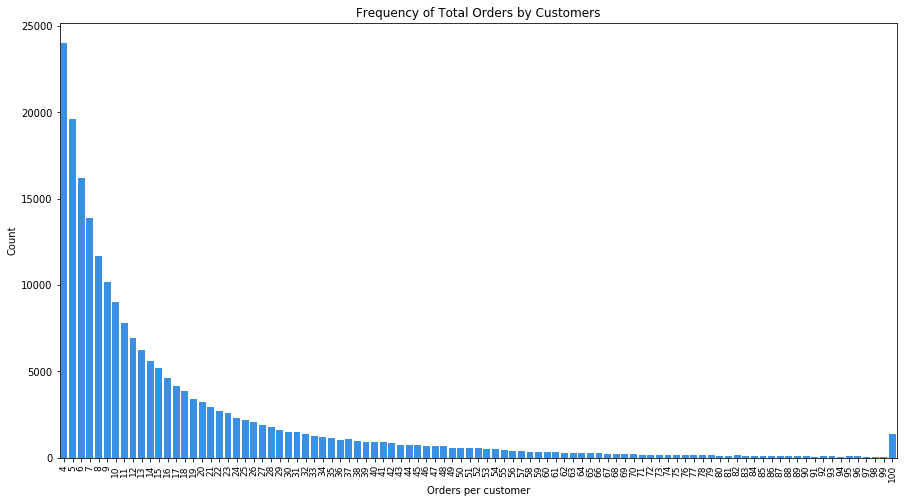

In [98]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x = order_number.index, y = order_number.values,color="dodgerblue");
ax.set_xlabel('Orders per customer');
ax.set_ylabel('Count');
ax.xaxis.set_tick_params(rotation=90, labelsize=9);
ax.set_title('Frequency of Total Orders by Customers');

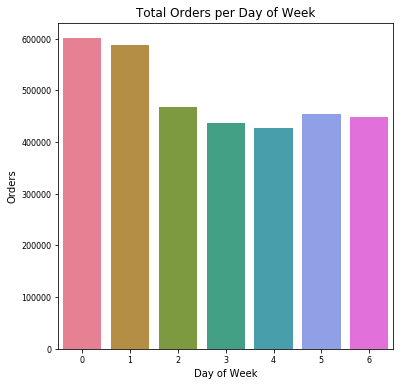

In [93]:
fig, ax = plt.subplots(figsize = (6,6))
ax = sns.countplot(order.order_dow,palette="husl")
ax.set_xlabel('Day of Week', size = 10)
ax.set_ylabel('Orders', size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.set_title('Total Orders per Day of Week')
fig.savefig('Total Orders per Day of Week.png')
plt.show()

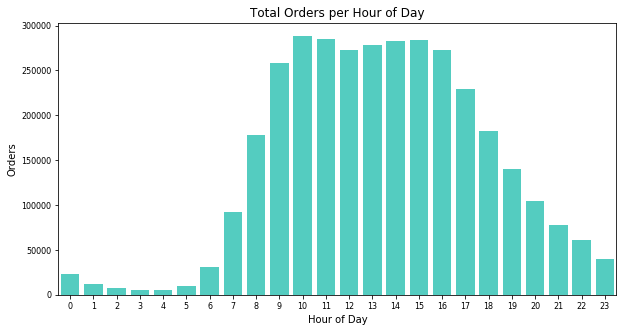

In [99]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(order.order_hour_of_day, color = 'turquoise')
ax.set_xlabel('Hour of Day', size = 10 )
ax.set_ylabel('Orders', size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.set_title('Total Orders per Hour of Day')
fig.savefig('Total Orders per Hour of Day.png')
plt.show()

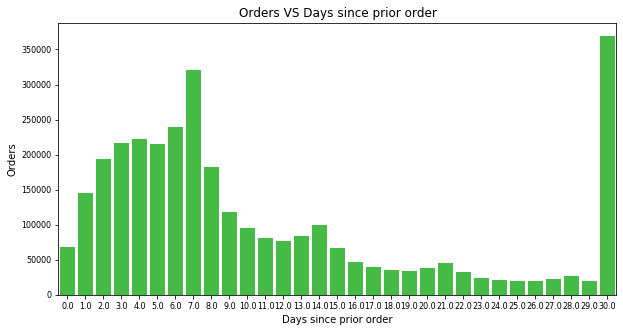

In [102]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(order.days_since_prior_order, color = 'limegreen')
ax.set_xlabel('Days since prior order', size = 10)
ax.set_ylabel('Orders', size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.set_title('Orders VS Days since prior order')
fig.savefig('Orders VS Days since prior order.png')
plt.show()

In [106]:
heatmap_df = order.groupby(["order_dow", "order_hour_of_day"])["order_number"].agg("count").reset_index()
heatmap_df = heatmap_df.pivot(index='order_dow', columns='order_hour_of_day', values='order_number')
heatmap_df.head()

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645


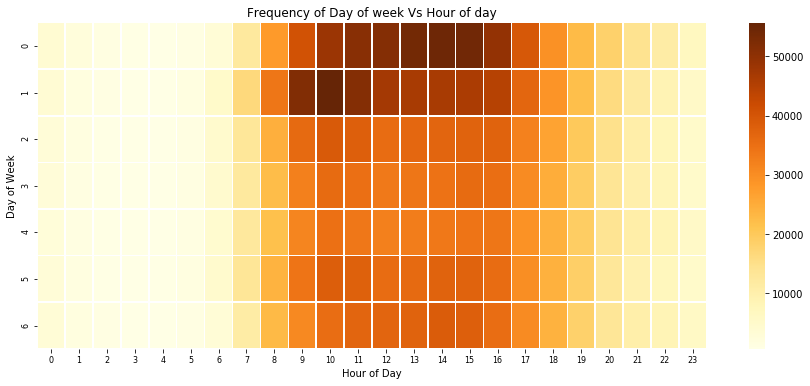

In [111]:
ax = plt.subplots(figsize=(15,6))
ax = sns.heatmap(heatmap_df, cmap="YlOrBr", linewidths=.5)
ax.set_title("Frequency of Day of week Vs Hour of day", size = 12)
ax.set_xlabel("Hour of Day", size = 10)
ax.set_ylabel("Day of Week", size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
fig = ax.get_figure()
plt.show()

In [13]:
print(prod.shape)
prod.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
